# Disease Prediction using symptoms in tkinter GUI


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,classification_report,precision_score,roc_curve
import seaborn as sns
from tkinter import *
from tkinter import messagebox
import sys 
import urllib
import urllib.request
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,classification_report,precision_score,roc_curve
from sklearn.utils import shuffle
from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from collections import Counter

C:\Users\Antonydeepa\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Antonydeepa\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Antonydeepa\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\Antonydeepa\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.read_csv('dataset.csv')
print(df.head())

df1 = pd.read_csv('Symptom-severity.csv')
print(df1.head())

            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symp

In [3]:
len(df)
print(df.shape)

(4920, 18)


# Data preprocessing

In [4]:
df.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

There are more NA's in this dataset from symptom_4 to symtom_17. It doesn't mean that they are missing values but it's just that the symptoms were not there for the patients for that particular disease 


**Now we will strip any leading and trailing whitespaces from the elements**

In [5]:
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)

**Filling the NA's with zero's**

In [6]:
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
print("The number of diseases are ",len(df['Disease'].unique()))
print("The number of symptoms are ",len(df1['Symptom'].unique()))

The number of diseases are  41
The number of symptoms are  132


<h2>Encoding the the symptoms with their severity weight</h2>

In [8]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=cols)

d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
df = d.replace('foul_smell_of urine',0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
(df[cols] == 0).all()

df['Disease'].value_counts()

df['Disease'].unique()

data = df.iloc[:,1:].values
labels = df['Disease'].values

<h2>Splitting the data and training the model</h2>

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.85)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4182, 17) (738, 17) (4182,) (738,)


In [11]:
SVM_unhyperd= SVC()
SVM_unhyperd.fit(x_train, y_train)
preds = SVM_unhyperd.predict(x_test)
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100,'|', 'Precision% =', precision_score(y_test, preds,average='macro')*100)

F1-score% = 93.90815129089266 | Accuracy% = 93.90243902439023 | Precision% = 94.31860311993331


**Using kfold for better training and testing**

In [12]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
SVM_unhyperd_train =cross_val_score(SVM_unhyperd, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(SVM_unhyperd_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (SVM_unhyperd_train.mean()*100.0, SVM_unhyperd_train.std()*100.0))

Mean Accuracy: 93.257%, Standard Deviation: (1.23%)


In [13]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
SVM_unhyperd_test =cross_val_score(SVM_unhyperd, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(SVM_unhyperd_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (SVM_unhyperd_test.mean()*100.0, SVM_unhyperd_test.std()*100.0))

Mean Accuracy: 80.902%, Standard Deviation: (3.51%)


In [14]:
print(classification_report(y_test, preds))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.95      0.78      0.86        23
                                   AIDS       0.93      1.00      0.97        14
                                   Acne       1.00      1.00      1.00        22
                    Alcoholic hepatitis       1.00      0.94      0.97        17
                                Allergy       0.88      0.88      0.88        17
                              Arthritis       0.87      0.87      0.87        15
                       Bronchial Asthma       0.64      0.69      0.67        13
                   Cervical spondylosis       0.86      0.95      0.90        20
                            Chicken pox       1.00      1.00      1.00        20
                    Chronic cholestasis       0.84      0.89      0.86        18
                            Common Cold       1.00      1.00      1.00        25
                           

**SVM with hypertuning**

In [15]:
SVM_hyperd = SVC(C=0.02, gamma=0.3, kernel='poly')
SVM_hyperd.fit(x_train, y_train)
preds = SVM_hyperd.predict(x_test)
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)

F1-score% = 98.93777193633721 | Accuracy% = 98.78048780487805


In [16]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
SVM_hyperd_train =cross_val_score(SVM_hyperd, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(SVM_hyperd_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (SVM_hyperd_train.mean()*100.0, SVM_hyperd_train.std()*100.0))

Mean Accuracy: 99.641%, Standard Deviation: (0.27%)


In [17]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
SVM_hyperd_test =cross_val_score(SVM_hyperd, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(SVM_hyperd_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (SVM_hyperd_test.mean()*100.0, SVM_hyperd_test.std()*100.0))

Mean Accuracy: 95.666%, Standard Deviation: (1.46%)


# Naive bayes

In [18]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
preds=gaussian.predict(x_test)
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)

F1-score% = 86.28876262026618 | Accuracy% = 87.12737127371274


In [19]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
gaussian_train =cross_val_score(gaussian, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(gaussian_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (gaussian_train.mean()*100.0, gaussian_train.std()*100.0))

Mean Accuracy: 86.873%, Standard Deviation: (1.41%)


In [20]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
gaussian_test =cross_val_score(gaussian, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(gaussian_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (gaussian_test.mean()*100.0, gaussian_test.std()*100.0))

Mean Accuracy: 89.165%, Standard Deviation: (3.19%)


# Decision tree

In [21]:
tree =DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=13)
tree.fit(x_train, y_train)
preds=tree.predict(x_test)
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)

F1-score% = 92.34746785070335 | Accuracy% = 91.32791327913279


In [22]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
DS_train =cross_val_score(tree, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(DS_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (DS_train.mean()*100.0, DS_train.std()*100.0))

Mean Accuracy: 95.528%, Standard Deviation: (2.11%)


In [23]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
DS_test =cross_val_score(tree, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(DS_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (DS_test.mean()*100.0, DS_test.std()*100.0))

Mean Accuracy: 90.111%, Standard Deviation: (3.87%)


**Using ensemble learning to see if it helps improving the decision tree model**

In [24]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score, accuracy_score

# Create a decision tree classifier with fixed hyperparameters
tree = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=13)

# Apply bagging with 50 base classifiers
bagging = BaggingClassifier(base_estimator=tree, n_estimators=50, random_state=42)
bagging.fit(x_train, y_train)
bagging_preds = bagging.predict(x_test)

# Calculate F1 score and accuracy for bagging
bagging_f1 = f1_score(y_test, bagging_preds, average='macro')
bagging_accuracy = accuracy_score(y_test, bagging_preds)

# Apply boosting with 50 base classifiers
boosting = AdaBoostClassifier(base_estimator=tree, n_estimators=50, random_state=42)
boosting.fit(x_train, y_train)
boosting_preds = boosting.predict(x_test)

# Calculate F1 score and accuracy for boosting
boosting_f1 = f1_score(y_test, boosting_preds, average='macro')
boosting_accuracy = accuracy_score(y_test, boosting_preds)

# Print results
print('Bagging - F1-score% =', bagging_f1*100, '|', 'Accuracy% =', bagging_accuracy*100)
print('Boosting - F1-score% =', boosting_f1*100, '|', 'Accuracy% =', boosting_accuracy*100)

Bagging - F1-score% = 99.09766309452674 | Accuracy% = 98.91598915989161
Boosting - F1-score% = 98.93777193633721 | Accuracy% = 98.78048780487805


**As we can see that bagging and boosting significantly improves the performance of the model**

In [25]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
ba_train =cross_val_score(bagging, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(ba_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (ba_train.mean()*100.0, DS_train.std()*100.0))

Mean Accuracy: 99.211%, Standard Deviation: (2.11%)


In [26]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
ba_test =cross_val_score(bagging, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(ba_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (ba_test.mean()*100.0, ba_test.std()*100.0))

Mean Accuracy: 95.800%, Standard Deviation: (2.31%)


In [27]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
bo_train =cross_val_score(boosting, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(bo_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (bo_train.mean()*100.0, DS_train.std()*100.0))

Mean Accuracy: 99.641%, Standard Deviation: (2.11%)


In [28]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
bo_test =cross_val_score(boosting, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(bo_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (bo_test.mean()*100.0, ba_test.std()*100.0))

Mean Accuracy: 96.076%, Standard Deviation: (2.31%)


In [29]:
# #%matplotlib inline
# # Create a bar chart to compare accuracies
# fig, ax = plt.subplots()
# ax.bar(['Decision tree','Bagging', 'Boosting'], [dt_acc,bagging_accuracy, boosting_accuracy])
# ax.set_ylim([0, 1])
# ax.set_ylabel('Accuracy')
# ax.set_title('Comparison of Model Accuracy with ensemble learning')
# plt.show()

In [30]:
# from tabulate import tabulate
# table = [["Model", "Accuracy"],
#          ["Decision tree", dt_acc],
#          ["Bagging", bagging_accuracy*100],
#          ["Boosting", boosting_accuracy*100]]

# print(tabulate(table, headers='firstrow'))

# Random forest

In [31]:
rfc=RandomForestClassifier(random_state=42)
rnd_forest = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 500, max_depth=13)
rnd_forest.fit(x_train,y_train)
preds=rnd_forest.predict(x_test)
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)

F1-score% = 99.21066977021066 | Accuracy% = 99.05149051490515


In [32]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_train =cross_val_score(rnd_forest, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_train.mean()*100.0, rnd_forest_train.std()*100.0))

Mean Accuracy: 99.450%, Standard Deviation: (0.36%)


In [33]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_test =cross_val_score(rnd_forest, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_test.mean()*100.0, rnd_forest_test.std()*100.0))

Mean Accuracy: 96.072%, Standard Deviation: (1.54%)


In [34]:
from sklearn.ensemble import StackingClassifier

# Define stacking model
estimators = [('SVM', SVM_hyperd), ('Gaussian', gaussian), ('Tree', tree),('RandomForest',rnd_forest)]
stack_model = StackingClassifier(estimators=estimators)

# Train stacking model
stack_model.fit(x_train, y_train)

# Make predictions using stacking model
stack_preds = stack_model.predict(x_test)

# Print evaluation metrics for stacking model
print('F1-score% =', f1_score(y_test, stack_preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, stack_preds)*100)

F1-score% = 98.43733961401568 | Accuracy% = 98.23848238482384


C:\Users\Antonydeepa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**As we can see that stacking the models increased the accuracy which is a great success, let's now see if it performs well in kfold**

In [35]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
stack_train =cross_val_score(stack_model, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(stack_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (stack_train.mean()*100.0, stack_train.std()*100.0))

C:\Users\Antonydeepa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Antonydeepa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

Mean Accuracy: 98.996%, Standard Deviation: (0.40%)


C:\Users\Antonydeepa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
stack_test =cross_val_score(stack_model, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(stack_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (stack_test.mean()*100.0, stack_test.std()*100.0))

C:\Users\Antonydeepa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Antonydeepa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

Mean Accuracy: 93.636%, Standard Deviation: (2.63%)


C:\Users\Antonydeepa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [37]:
# Define the list of model names and corresponding accuracy and F1-score values
model_names = ['SVM', 'Gaussian NB', 'Bagging for DT', 'Boosting for DT', 'Random Forest', 'Stacking']
accuracies = [accuracy_score(y_test, preds)*100 for preds in [SVM_unhyperd.predict(x_test), gaussian.predict(x_test), bagging.predict(x_test), boosting.predict(x_test), rnd_forest.predict(x_test), stack_preds]]
f1_scores = [f1_score(y_test, preds, average='macro')*100 for preds in [SVM_unhyperd.predict(x_test), gaussian.predict(x_test), bagging.predict(x_test), boosting.predict(x_test), rnd_forest.predict(x_test), stack_preds]]

# Create a dictionary with the data
data = {'Models': model_names, 'Accuracy': accuracies, 'F1-Score': f1_scores}
data['Models'].append('Decision tree')
data['Accuracy'].append(94.98644986449864)
data['F1-Score'].append(95.77752736327078) 

# Create the dataframe
acc = pd.DataFrame(data)
print(acc)

            Models   Accuracy   F1-Score
0              SVM  93.902439  93.908151
1      Gaussian NB  87.127371  86.288763
2   Bagging for DT  98.915989  99.097663
3  Boosting for DT  98.780488  98.937772
4    Random Forest  99.051491  99.210670
5         Stacking  98.238482  98.437340
6    Decision tree  94.986450  95.777527


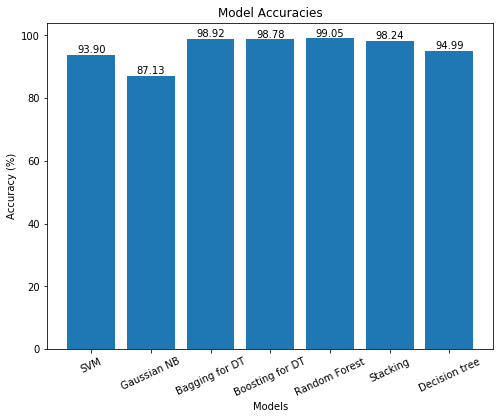

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))
rects = ax.bar(acc['Models'], acc['Accuracy'])
ax.set_xticklabels(acc['Models'], rotation=25)
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
for rect, val in zip(rects, acc['Accuracy']):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{val:.2f}', ha='center', va='bottom')
# Save the plot as a jpg file
plt.savefig('model_accuracies.png')   
plt.show()

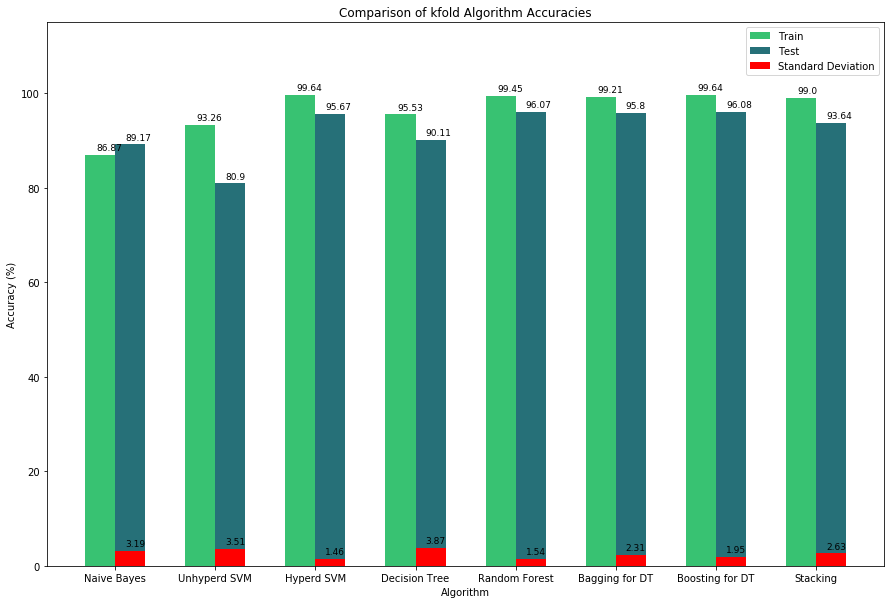

In [39]:
n_groups = 8
algorithms = ('Naive Bayes','Unhyperd SVM', 'Hyperd SVM','Decision Tree', 'Random Forest','Bagging for DT','Boosting for DT','Stacking')
train_accuracy = (gaussian_train.mean()*100.0, 
                 SVM_unhyperd_train.mean()*100.0,
                 SVM_hyperd_train.mean()*100.0,
                 DS_train.mean()*100.0,
                 rnd_forest_train.mean()*100.0,
                  ba_train.mean()*100.0,
                  bo_train.mean()*100.0,
                  stack_train.mean()*100.0
                 )


test_accuracy = (gaussian_test.mean()*100.0, 
                 SVM_unhyperd_test.mean()*100.0,
                 SVM_hyperd_test.mean()*100.0,
                 DS_test.mean()*100.0,
                 rnd_forest_test.mean()*100.0,
                 ba_test.mean()*100.0,
                  bo_test.mean()*100.0,
                 stack_test.mean()*100.0
                 )

Standard_Deviation=(gaussian_test.std()*100.0, 
                 SVM_unhyperd_test.std()*100.0,
                 SVM_hyperd_test.std()*100.0,
                 DS_test.std()*100.0,     
                 rnd_forest_test.std()*100.0,
                    ba_test.std()*100.0,
                  bo_test.std()*100.0,
                    stack_test.std()*100.0
                 
                   )

# create plot
fig, ax = plt.subplots(figsize=(15, 10))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 1
rects1 = plt.bar(index, train_accuracy, bar_width, alpha = opacity, color='#38c272', label='Train')
rects2 = plt.bar(index + bar_width, test_accuracy, bar_width, alpha = opacity, color='#267078', label='Test')
rects3 = plt.bar(index + bar_width, Standard_Deviation, bar_width, alpha = opacity, color='red', label='Standard Deviation')
plt.xlabel('Algorithm') # x axis label
plt.ylabel('Accuracy (%)') # y axis label
plt.ylim(0, 115)
plt.title('Comparison of kfold Algorithm Accuracies') # plot title
plt.xticks(index + bar_width * 0.5, algorithms) # x axis data labels
plt.legend(loc = 'upper right') # show legend
for index, data in enumerate(train_accuracy):
    plt.text(x = index - 0.035, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 9))
for index, data in enumerate(test_accuracy):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 9))
for index, data in enumerate(Standard_Deviation):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 9))    
plt.savefig('Comparison of kfold Algorithm Accuracies.png')   
    

**So from all models, we can clearly see that RandomForest model performs the best. So we will use the random forest model for our tkinter**

**Creating the message and model prediction functions for the Tkinter GUI**

In [40]:
import webbrowser

In [41]:
def message():
    if (Symptom1.get() == "None" and  Symptom2.get() == "None" and Symptom3.get() == "None" and Symptom4.get() == "None" and Symptom5.get() == "None"):
        messagebox.showinfo("OPPS!!", "ENTER  SYMPTOMS PLEASE")
    else :
        rfc()

def rfc():
    psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]
    a = np.array(df1["Symptom"])
    b = np.array(df1["weight"])
    for j in range(len(psymptoms)):
        for k in range(len(a)):
            if psymptoms[j]==a[k]:
                psymptoms[j]=b[k]

    nulls = [0,0,0,0,0,0,0,0,0,0,0,0]
    psy = [psymptoms + nulls]

    pred2 = rnd_forest.predict(psy)
    t3.delete("1.0", END)
    t3.insert(END, pred2[0])
    
    # Prompt user to check nearby hospitals
    answer = messagebox.askyesno("Check nearby hospitals", "Do you want to check nearby hospitals?")
    if answer == 1:
        # Open website URL for nearby hospitals
        webbrowser.open("https://www.justdial.com/Chennai/Hospitals-in-Vit-University-Vandalur/nct-10253670")

**Designing of Tkinter GUI for predicting the disease and displaying nearby hospitals**

In [ ]:
root = Tk()
root.title(" Disease Prediction From Symptoms")
root.configure()

Symptom1 = StringVar()
Symptom1.set(None)
Symptom2 = StringVar()
Symptom2.set(None)
Symptom3 = StringVar()
Symptom3.set(None)
Symptom4 = StringVar()
Symptom4.set(None)
Symptom5 = StringVar()
Symptom5.set(None)

w2 = Label(root, justify=CENTER, text=" Disease Prediction From Symptoms ")
w2.config(font=("Helvetica", 30))
w2.grid(row=1, column=0, columnspan=2, padx=100)

NameLb1 = Label(root, text="")
NameLb1.config(font=("Helvetica", 20))
NameLb1.grid(row=5, column=1, pady=10,  sticky=W)

S1Lb = Label(root,  text="Symptom 1")
S1Lb.config(font=("Helvetica", 15))
S1Lb.grid(row=7, column=1, pady=10 , sticky=W)

S2Lb = Label(root,  text="Symptom 2")
S2Lb.config(font=("Helvetica", 15))
S2Lb.grid(row=8, column=1, pady=10, sticky=W)

S3Lb = Label(root,  text="Symptom 3")
S3Lb.config(font=("Helvetica", 15))
S3Lb.grid(row=9, column=1, pady=10, sticky=W)

S4Lb = Label(root,  text="Symptom 4")
S4Lb.config(font=("Helvetica", 15))
S4Lb.grid(row=10, column=1, pady=10, sticky=W)

S5Lb = Label(root,  text="Symptom 5")
S5Lb.config(font=("Helvetica", 15))
S5Lb.grid(row=11, column=1, pady=10, sticky=W)

lr = Button(root, text="Predict",height=2, width=20, command=message)
lr.config(font=("Helvetica", 15))
lr.grid(row=15, column=1,pady=10)



#OPTIONS = sorted(symptoms)
OPTIONS = ['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue',
       'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings',
       'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat',
       'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain',
       'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever',
       'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure',
       'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes',
       'malaise', 'blurred_and_distorted_vision', 'phlegm',
       'throat_irritation', 'redness_of_eyes', 'sinus_pressure',
       'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs',
       'fast_heart_rate', 'pain_during_bowel_movements',
       'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus',
       'neck_pain', 'dizziness', 'cramps', 'bruising', 'obesity',
       'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes',
       'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties',
       'excessive_hunger', 'extra_marital_contacts',
       'drying_and_tingling_lips', 'slurred_speech', 'knee_pain',
       'hip_joint_pain', 'muscle_weakness', 'stiff_neck',
       'swelling_joints', 'movement_stiffness', 'spinning_movements',
       'loss_of_balance', 'unsteadiness', 'weakness_of_one_body_side',
       'loss_of_smell', 'bladder_discomfort', 'foul_smell_ofurine',
       'continuous_feel_of_urine', 'passage_of_gases', 'internal_itching',
       'toxic_look_(typhos)', 'depression', 'irritability', 'muscle_pain',
       'altered_sensorium', 'red_spots_over_body', 'belly_pain',
       'abnormal_menstruation', 'dischromic_patches',
       'watering_from_eyes', 'increased_appetite', 'polyuria',
       'family_history', 'mucoid_sputum', 'rusty_sputum',
       'lack_of_concentration', 'visual_disturbances',
       'receiving_blood_transfusion', 'receiving_unsterile_injections',
       'coma', 'stomach_bleeding', 'distention_of_abdomen',
       'history_of_alcohol_consumption', 'blood_in_sputum',
       'prominent_veins_on_calf', 'palpitations', 'painful_walking',
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails',
       'inflammatory_nails', 'blister', 'red_sore_around_nose',
       'yellow_crust_ooze', 'prognosis']

S1En = OptionMenu(root, Symptom1,*OPTIONS)
S1En.grid(row=7, column=1)

S2En = OptionMenu(root, Symptom2,*OPTIONS)
S2En.grid(row=8, column=1)

S3En = OptionMenu(root, Symptom3,*OPTIONS)
S3En.grid(row=9, column=1)

S4En = OptionMenu(root, Symptom4,*OPTIONS)
S4En.grid(row=10, column=1)

S5En = OptionMenu(root, Symptom5,*OPTIONS)
S5En.grid(row=11, column=1)

NameLb = Label(root, text="")
NameLb.config(font=("Helvetica", 20))
NameLb.grid(row=13, column=1, pady=10,  sticky=W)

NameLb = Label(root, text="")
NameLb.config(font=("Helvetica", 15))
NameLb.grid(row=18, column=1, pady=10,  sticky=W)

t3 = Text(root, height=2, width=20)
t3.config(font=("Helvetica", 20))
t3.grid(row=19, column=1 , padx=10)

root.mainloop()

# Visualizing 

In [6]:
new_df = pd.read_csv('dataset.csv')
new_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**The first letter is only capitialized here. But we may enter in lower case or upper case. So, Captializing each word of all the disease names to get no error in the prompt**

In [ ]:
new_df['Disease']=new_df['Disease'].str.title()

**Creating functions for the visualization and to create tkinter GUI to get the user input of the disease they want the visualisations for and to get a particular disease's symtom count**

In [ ]:
import pandas as pd
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk

# Read the CSV file into a pandas dataframe
df3 = pd.read_csv("symptom_precaution1.csv")

# Define a function to handle button clicks
def show_precautions():
    # Clear the text widget
    text.delete("1.0", tk.END)

    # Get the disease name from the entry widget
    disease = entry.get()

    # Find the row of the dataframe that matches the disease name
    match = df3[df3["Disease"].str.lower() == disease.lower()]

    # Print the description for the matching row
    if match.empty:
        text.insert(tk.END, "No disease found.")
    else:
        description = match["Description"].values[0]
        text.insert(tk.END, f"{description}\n\n")

        # Prompt the user to see precautions using a message box
        response = messagebox.askyesno("Precautions", "Would you like to see the precautions?")

        # Print the precautions for the matching row if user selects Yes
        if response == True:
            precautions = []
            for i in range(1, 5):
                precaution = match[f"Precaution_{i}"].values[0]
                if isinstance(precaution, str):
                    precautions.append(precaution)
            if len(precautions) == 0:
                text.insert(tk.END, "No precautions found.")
            else:
                text.insert(tk.END, "\nPlease take these precautions if you suspect that you have the disease or if you are not feeling well and immediately go see a doctor, your health is very important!!!.""  \n(NOTE:These are not the only preventive measures and may or may not work depending on that particular person.)\n\n")
                for i, precaution in enumerate(precautions):
                    text.insert(tk.END, f"{i+1}. {precaution}\n")
        else:
            text.insert(tk.END, "Thank you for using our application.")

# Create the main window
window = tk.Tk()
window.title("SmartAI for Disease Information")
window.geometry("780x480")
window.configure(bg="#333")

# Create the widgets
label = tk.Label(window, text="Enter a disease name:", fg="white", bg="#333", font=("Helvetica", 14))
entry = tk.Entry(window, font=("Helvetica", 14))
button = tk.Button(window, text="Show Description", command=show_precautions, fg="white", bg="#00cc66", font=("Helvetica", 12, "bold"))
text = tk.Text(window, height=20, width=100, wrap="word", font=("Helvetica", 12), padx=10, pady=10, bg="#444", fg="white")
text.configure(insertbackground="white")

# Add the widgets to the window
label.pack(pady=10)
entry.pack(pady=10)
button.pack(pady=10)
text.pack(pady=10)

# Configure window colors
window.tk_setPalette(background="#333", foreground="white", activeBackground="#444", activeForeground="white")

# Start the event loop
window.mainloop()

**To create a Tkinter GUI to get the user input of the disease they want the description and precautions.**

In [ ]:
import pandas as pd
import tkinter as tk

# Read the CSV file into a pandas dataframe
df3 = pd.read_csv("symptom_precaution.csv")

# Define a function to handle button clicks
def show_precautions():
    # Clear the text widget
    text.delete("1.0", tk.END)

    # Get the disease name from the entry widget
    disease = entry.get()

    # Find the row of the dataframe that matches the disease name
    match = df3[df3["Disease"].str.lower() == disease.lower()]

    # Print the precautions for the matching row
    if match.empty:
        text.insert(tk.END, "No precautions found.")
    else:
        precautions = []
        for i in range(1, 5):
            precaution = match[f"Precaution_{i}"].values[0]
            if isinstance(precaution, str):
                precautions.append(precaution)
        if len(precautions) == 0:
            text.insert(tk.END, "No precautions found.")
        else:
            text.insert(tk.END, "Please take these precautions, your health is very important!!!.  (NOTE:These are not the only preventive measures and may or maynot work depending on that particular person.\n\n")
            for i, precaution in enumerate(precautions):
                text.insert(tk.END, f"{i+1}. {precaution}\n")

# Create the main window
window = tk.Tk()
window.title("Disease Precautions")

# Create the widgets
label = tk.Label(window, text="Enter a disease name:")
entry = tk.Entry(window)
button = tk.Button(window, text="Show Precautions", command=show_precautions)
text = tk.Text(window, height=40,width=140)

# Add the widgets to the window
label.pack()
entry.pack()
button.pack()
text.pack()

# Start the event loop
window.mainloop()

Litte statistics and visualization

In [3]:
new_df1 = pd.read_csv('Symptom-severity.csv')
new_df1.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [4]:
new_df1['Symptom'].unique()

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue',
       'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings',
       'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat',
       'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain',
       'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever',
       'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure',
       'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes',
       'malaise', 'blurred_and_distorted_vision', 'phlegm',
       'throat_irritation', 'redness_of_eyes', 'sinus_pressu

In [7]:
print("The number of diseases are ",len(new_df['Disease'].unique()))
print("The number of symptoms are ",len(new_df1['Symptom'].unique()))

The number of diseases are  41
The number of symptoms are  132


In [8]:
symp_cols = new_df[new_df.columns[1:]].columns
symp_cols

Index(['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5',
       'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10',
       'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15',
       'Symptom_16', 'Symptom_17'],
      dtype='object')

Wall time: 1.2 s


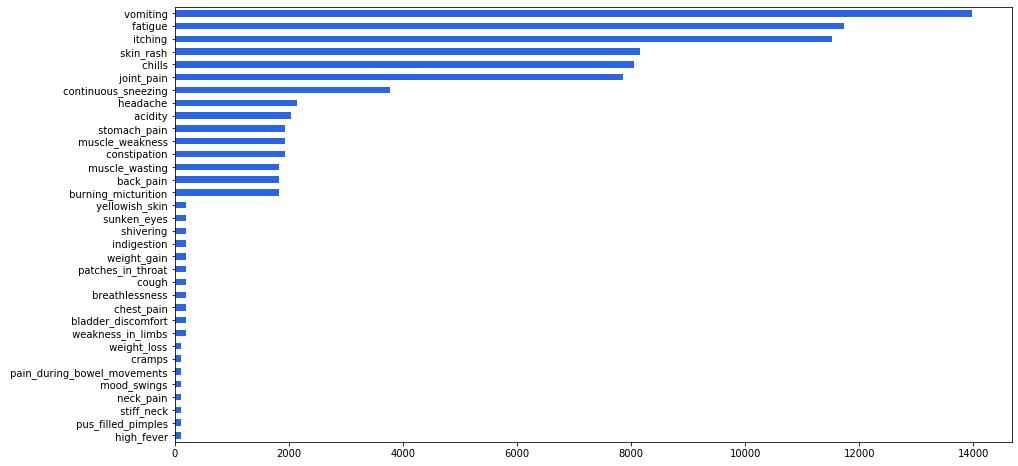

In [11]:
%%time
values = []
for col in symp_cols :
    values = values + list(new_df[symp_cols[0]].values)
counter = Counter(values)
results = pd.Series(dict(counter))
results.sort_values(ascending=True).plot(kind='barh',figsize=(15,8),color='#2b65e3')
plt.savefig('symptom.png')

**From the plot above, it is seen that the symptom "Vomitting" is the most frequent and experienced symptom for all the patients who is suffering from all these diseases**

# Setup Files for cx_Freeze

**SmartAI app setup file**

In [ ]:
import sys
from cx_Freeze import setup, Executable
from glob import glob

# Get all csv files in the directory
csv_files = glob("*.csv")

# Dependencies are automatically detected, but it might need fine tuning.
build_exe_options = {"packages": ["os", "pandas", "tkinter", "numpy"], "excludes": [], "include_files": csv_files}

# GUI applications require a different base on Windows (the default is for a console application).
base = None
if sys.platform == "win32":
    base = "Win32GUI"

setup(
    name="SmartAI for Disease Information",
    version="1.0",
    description="Application for disease information",
    options={"build_exe": build_exe_options},
    executables=[Executable("test5.py", base=base)]
)


**SmartShield app setup file**

In [ ]:
import sys
from cx_Freeze import setup, Executable
import os.path

# Define the path to the CSV file
data_files = [os.path.join(os.path.dirname(__file__), "symptom_precaution1.csv")]

# Dependencies are automatically detected, but it might need fine tuning.
build_exe_options = {"packages": ["pandas", "tkinter", "numpy"], "excludes": [], "include_files": data_files, "include_msvcr": True}

# GUI applications require a different base on Windows (the default is for a console application).
base = None
if sys.platform == "win32":
    base = "Win32GUI"

setup(
    name="SmartAI for Disease Information",
    version="1.0",
    description="Application for disease information",
    options={"build_exe": build_exe_options},
    executables=[Executable("test5.py", base=base)]
)


**SymptomSpy app setup file**

In [ ]:
import sys
from cx_Freeze import setup, Executable
from glob import glob

# Get all csv files in the directory
csv_files = glob("*.csv")

# Dependencies are automatically detected, but it might need fine tuning.
build_exe_options = {"packages": ["os", "pandas", "tkinter", "numpy", "matplotlib", "seaborn"], "excludes": [], "include_files": csv_files}

# GUI applications require a different base on Windows (the default is for a console application).
base = None
if sys.platform == "win32":
    base = "Win32GUI"

setup(
    name="SmartAI for Disease Visualization",
    version="1.0",
    description="Application for Disease visualization",
    options={"build_exe": build_exe_options},
    executables=[Executable("untitled50.py", base=base)]
)

**Code for conversion fo setup.py to .exe apps to be done in terminal using cx_Freeze package**

In [ ]:
python build setup.py